# Import Libraries

In [2]:
# libraries that deal with grabbing from the .env file
from dotenv import load_dotenv
import os

# make url requests
import requests

# make DFs
import pandas as pd

# show images in notebook
from IPython.display import display, Image

import ast  # for safely parsing JSON strings in Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import requests

from ratelimit import limits, sleep_and_retry
import requests

# Setup stuff

In [3]:
# Remove the cached environment variable (if any)
os.environ.pop('riot_api_key', None)

# Reload the .env file
load_dotenv()

# Fetch the API key
api_key = os.environ.get('riot_api_key')

# Defining Functions

## Get Puuid

In [4]:
def get_puuid(summonerId=None, gameName=None, tagLine=None, region='americas'):
    """Gets the puuid from a summonerId or Riot_id and riot_tag
    
    Args:
        summonerId (str, optional): Summoner ID. Defaults to None.
        gameName (str, optional): Riot ID. Defaults to None.
        tagLine (str, optional): Riot Tag. Defaults to None.
        region (str, optional): Region. Defaults to 'americas'.
        
    Returns:
        str: puuid
    """
# using summonerID 
    if summonerId is not None:
        root_url = f'https://{region}.api.riotgames.com/'
        endpoint = 'lol/summoner/v4/summoners/'
        print(root_url+endpoint+summonerId+'?api_key='+api_key)
        response = requests.get(root_url+endpoint+summonerId+'?api_key='+api_key)

        return response.json()['puuid']
    else:
        #using gamename + tagline for example HGILLIS + NA1
        root_url = f'https://{region}.api.riotgames.com/'
        endpoint = f'riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}'

        response = requests.get(root_url+endpoint+'?api_key='+api_key)

        return response.json()['puuid']
    


## Get match history (list of game ids)

In [5]:
def get_match_history(region=None, puuid=None, start=0, count=48):
    root_url = f'https://{region}.api.riotgames.com/'
    endpoint = f'lol/match/v5/matches/by-puuid/{puuid}/ids'
    query_params = f'?start={start}&count={count}' #changing starting index (start) and number of matches retrieved (count)

    response = requests.get(root_url + endpoint + query_params + '&api_key=' + api_key)
    
    return response.json()


## get info for single game

In [6]:
def get_match_data_from_id(region = None, matchId = None):

    root_url = f'https://{region}.api.riotgames.com/'
    endpoint = f'lol/match/v5/matches/{matchId}'


    response = requests.get(root_url + endpoint + '?api_key=' + api_key)

    return response.json()

## Process match history

In [7]:


def process_match_json(match_json, puuid):
    ## Architecture
    # left side is my name, right side is riots name
    metadata = match_json['metadata']
    info = match_json['info']
    game_mode = info['gameMode']
    players = info['participants']
    participants = metadata['participants']
    teams = info['teams']
    player = players[participants.index(puuid)]
    perks = player['perks']
    stats = perks ['statPerks']
    styles = perks['styles']

    primary = styles[0]
    secondary = styles[1]

    match_id = metadata['matchId']


    game_creation = info['gameCreation']
    game_duration = info['gameDuration']
    game_start_timestamp = info['gameStartTimestamp']
    game_end_timestamp = info['gameEndTimestamp']
    patch = info['gameVersion']

    riot_id = player['riotIdGameName']
    riot_tag = player['riotIdTagline']
    summoner_id = player['summonerId']
    summoner_name = player['summonerName']

    win = player['win']

    champ_id = player['championId']
    champ_transform = player['championTransform']
    champ_level = player['champLevel']

    gold_earned = player['goldEarned']
    neutral_minions_killed = player['neutralMinionsKilled']
    total_minions_killed = player['totalMinionsKilled']

    kills = player['kills']
    deaths = player['deaths']
    assists = player['assists']
    first_blood = player['firstBloodKill']

    total_damage_dealt= player['totalDamageDealtToChampions']
    total_damage_shielded = player['totalDamageShieldedOnTeammates']
    total_damage_taken = player['totalDamageTaken']
    total_damage_healed = player['totalHealsOnTeammates']
    total_minions_killed = player['totalMinionsKilled']
    total_time_cc_dealt = player['totalTimeCCDealt']

    early_surrender = player['gameEndedInEarlySurrender']
    surrender = player['gameEndedInSurrender']

    item0 = player['item0']
    item1 = player['item1']
    item2 = player['item2']
    item3 = player['item3']
    item4 = player['item4']
    item5 = player['item5']
    item6 = player['item6']

    summoner_1_id = player['summoner1Id']
    summoner_2_id = player['summoner2Id']


    wards_placed = player['wardsPlaced']
    vision_score = player['visionScore']







    defense = stats['defense']
    flex = stats['flex']
    offense = stats['offense']


    primary_style = primary['style']
    secondary_style = primary['style']

    primary_keystone = primary['selections'][0]['perk']
    primary_perk_1 = primary['selections'][1]['perk']
    primary_perk_2 = primary['selections'][2]['perk']
    primary_perk_3 = primary['selections'][3]['perk']

    secondary_perk_1 = secondary['selections'][0]['perk']
    secondary_perk_2 = secondary['selections'][1]['perk']


    objectives_stolen = player['objectivesStolen']
    objectives_stolen_assists = player['objectivesStolenAssists']

    ##what is this?
    detector_wars_placed = player['detectorWardsPlaced']
    vision_wards_bought = player['visionWardsBoughtInGame']
    role = player['role']

    damage_dealt_to_buildings = player['damageDealtToBuildings']
    damage_dealt_to_objectives = player['damageDealtToObjectives']
    damage_dealt_to_turrets = player['damageDealtToTurrets']
    game_ended_in_surrender = player['gameEndedInSurrender']
    gold_earned = player['goldEarned']
    individual_position = player['individualPosition']
    inhibitor_takedowns = player['inhibitorTakedowns']
    largest_killing_spree = player['largestKillingSpree']
    largest_multi_kill = player['largestMultiKill']
    total_damage_shielded_on_teammates = player['totalDamageShieldedOnTeammates']
    total_heals_on_teammates = player['totalHealsOnTeammates']
    total_minions_killed = player['totalMinionsKilled']
    vision_score = player['visionScore']


    matchDF = pd.DataFrame({
        'match_id': [match_id],
        'game_mode': [game_mode],
        'participants': [participants],
        'game_creation': [game_creation],
        'game_duration': [game_duration],
        'game_start_timestamp': [game_start_timestamp],
        'game_end_timestamp': [game_end_timestamp],
        'patch': [patch],
        'puuid': [puuid],
        'riot_id': [riot_id],
        'riot_tag': [riot_tag],
        'summoner_id': [summoner_id],
        'summoner_name': [summoner_name],
        'win': [win],
        'champion': [champ_id],
        'champion_transform': [champ_transform],
        'champion_level': [champ_level],
        'kills': [kills],
        'deaths': [deaths],
        'assists': [assists],
        'summoner1_id': [summoner_1_id],
        'summoner2_id': [summoner_2_id],
        'gold_earned': [gold_earned],
        'total_minions_killed': [total_minions_killed],
        'total_neutral_minions_killed': [neutral_minions_killed],
        'early_surrender': [early_surrender],
        'surrender': [surrender],
        'first_blood': [first_blood],
        'objectives_stolen': [objectives_stolen],
        'objectives_stolen_assists': [objectives_stolen_assists],
        'total_damage_dealt_champions': [total_damage_dealt],
        'total_damage_taken': [total_damage_taken],
        'total_damage_shielded_teammates': [total_damage_shielded],
        'total_time_crowd_controlled': [total_time_cc_dealt],
        'vision_score': [vision_score],
        'wards_placed': [wards_placed],
        'item0': [item0],
        'item1': [item1],
        'item2': [item2],
        'item3': [item3],
        'item4': [item4],
        'item5': [item5],
        'item6': [item6],
        'perk_keystone': [primary_keystone],
        'perk_primary_row_1': [primary_perk_1],
        'perk_primary_row_2': [primary_perk_2],
        'perk_primary_row_3': [primary_perk_3],
        'perk_secondary_row_1': [secondary_perk_1],
        'perk_secondary_row_2': [secondary_perk_2],
        'perk_primary_style': [primary_style],
        'perk_secondary_style': [secondary_style],
        'perk_shard_defense': [defense],
        'perk_shard_flex': [flex],
        'perk_shard_offense': [offense],
        'damage_dealt_to_buildings': [damage_dealt_to_buildings],
        'damage_dealt_to_objectives': [damage_dealt_to_objectives],
        'damage_dealt_to_turrets': [damage_dealt_to_turrets],
        'game_ended_in_surrender': [game_ended_in_surrender],
        'individual_position': [individual_position],
        'inhibitor_takedowns': [inhibitor_takedowns],
        'largest_killing_spree': [largest_killing_spree],
        'largest_multi_kill': [largest_multi_kill],
        'total_damage_shielded_on_teammates': [total_damage_shielded_on_teammates],
        'total_heals_on_teammates': [total_heals_on_teammates],
        'total_minions_killed': [total_minions_killed],
        'vision_score': [vision_score],
    })


    return matchDF


## go from json to english

In [8]:

def json_extract(obj, key):
    arr = []
    
    def extract(obj, arr, key):
        if isinstance(obj, dict):
            for k, v in obj.items():
                if k == key:
                    arr.append(v)
                elif isinstance(v, (dict, list)):
                    extract(v, arr, key)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    values = extract(obj, arr, key)
    return values


# Community Dragon

In [9]:
# keys to go from numbers to actual names

perk = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/perks.json'
perk_styles = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/perkstyles.json'
champ = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/champion-summary.json'
item = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/items.json'

perk_json = requests.get(perk).json()
perk_styles_json = requests.get(perk_styles).json()
champ_json = requests.get(champ).json()
item_json = requests.get(item).json()

In [10]:
# code to replace all of the perk numbers with the actual perks

perk_ids = json_extract(perk_json, 'id')
perk_names = json_extract(perk_json, 'name')

perk_dict = dict(map(lambda i, j : (int(i),j), perk_ids, perk_names))

perk_styles_ids = json_extract(perk_styles_json, 'id')
perk_styles_names = json_extract(perk_styles_json, 'name')

perk_styles_dict = dict(map(lambda i, j : (int(i),j), perk_styles_ids, perk_styles_names))

In [11]:
# code to replace all of the champion numbers with the actual champions
champ_ids = json_extract(champ_json, 'id')
champ_names = json_extract(champ_json, 'name')

# Assuming champ_json is a list of dictionaries with each dictionary containing 'id' and 'name'
champ_dict = {int(champ['id']): champ['name'] for champ in champ_json}



In [12]:
# code to replace all of the item numbers with the actual items
item_ids = json_extract(item_json, 'id')
item_names = json_extract(item_json, 'name')

# Assuming champ_json is a list of dictionaries with each dictionary containing 'id' and 'name'
item_dict = {int(item['id']): item['name'] for item in item_json}


# Get player names

In [13]:
# input username, region code here, asking for user input

# Prompt user for input
gameNameOne = input("Enter your summoner: ")


# Prompt user for input with a default value
tagLineOne = input("Enter tagline (default: NA1): ")

# Use default value if input is empty
tagLineOne = tagLineOne if tagLineOne.strip() else "NA1"

print(gameNameOne, tagLineOne)






# input username, region code here, asking for user input

# Prompt user for input of second player
gameNameTwo = input("Enter your friends summoner: ")


# Prompt user for input with a default value
tagLineTwo = input("Enter tagline (default: NA1): ")

# Use default value if input is empty
tagLineTwo = tagLineTwo if tagLineTwo.strip() else "NA1"

print(gameNameTwo, tagLineTwo)



HGILLIS NA1
MitchTheGreatest NA1


# Get both players PUUIDs

In [14]:
# get player 1 puuid
puuidOne = get_puuid(gameName=gameNameOne, tagLine=tagLineOne)

# get player 2 puuid
puuidTwo = get_puuid(gameName=gameNameTwo, tagLine=tagLineTwo)

print(puuidOne)
print(puuidTwo)

V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoDgxwUtdIeVTZrmOzjeVHklBRlCJr1tz1g
v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZVShcbpHA_rqcGRtvR_jdIltku3KSZRBYw


# Get both players match histories

In [15]:
# Get match IDs for the first game
match_idsOne = get_match_history(region='americas', puuid=puuidOne)

# Initialize an empty DataFrame for the first game
matchHistoryDfOne = pd.DataFrame()

# Populate the DataFrame with match data for the first game
for match_id in match_idsOne:
    gameone = get_match_data_from_id(region='americas', matchId=match_id)
    matchDFOne = process_match_json(gameone, puuid=puuidOne)
    matchHistoryDfOne = pd.concat([matchHistoryDfOne, matchDFOne])

# Get match IDs for the second game
match_idsTwo = get_match_history(region='americas', puuid=puuidTwo)

# Initialize an empty DataFrame for the second game
matchHistoryDfTwo = pd.DataFrame()

# Populate the DataFrame with match data for the second game
for match_id in match_idsTwo:
    gametwo = get_match_data_from_id(region='americas', matchId=match_id)
    matchDFTwo = process_match_json(gametwo, puuid=puuidTwo)
    matchHistoryDfTwo = pd.concat([matchHistoryDfTwo, matchDFTwo])

# Now, `matchHistoryDfOne` and `matchHistoryDfTwo` are isolated and contain data for different game names


KeyError: 'metadata'

In [16]:
matchHistoryDfOne


,match_id,game_mode,participants,game_creation,game_duration,game_start_timestamp,game_end_timestamp,patch,puuid,riot_id,...,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,NA1_5183290141,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734323501921,2187,1734323746573,1734325933833,14.24.643.5128,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,2034,2135,2034,False,UTILITY,0,0,1,1835,2550
0,NA1_5183249627,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734321321424,1858,1734321401751,1734323259816,14.24.643.5128,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,1749,2599,1749,True,UTILITY,0,2,2,0,164
0,NA1_5181444806,CLASSIC,[zidX4wyMk3i2Kogfu0UrrxWhbwAgQ1nBHvCwdEi287nAS...,1734153465699,1733,1734153550843,1734155283741,14.24.643.5128,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,258,3157,258,False,UTILITY,0,0,1,0,0
0,NA1_5181412050,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734151584129,1476,1734151657800,1734153134085,14.24.643.5128,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,3937,4101,3937,False,UTILITY,2,2,1,9572,1343
0,NA1_5179458819,CLASSIC,[CBD1l26RzaFFa-cImBA7O9wwGvH3h7h3vxTCfqbY8UbgU...,1733964142972,3042,1733964228361,1733967270880,14.24.642.1879,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,724,3594,724,False,UTILITY,0,0,1,0,0
0,NA1_5179431661,CLASSIC,[-34neXe-6Jv5gh-aG1oG30Qj4K2_nUyaQk7aKYAdmlP75...,1733962492140,1296,1733962606178,1733963902677,14.24.642.1879,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,247,467,247,True,UTILITY,0,0,1,839,0
0,NA1_5176298198,CLASSIC,[-qcVfkj8M4tsiLxecUkLkTk8OtK7OBZwvihx3LOKlFuJY...,1733630947328,1593,1733630972745,1733632566345,14.23.636.9832,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,182,10975,182,False,JUNGLE,0,0,1,0,0
0,NA1_5175485627,CLASSIC,[-qcVfkj8M4tsiLxecUkLkTk8OtK7OBZwvihx3LOKlFuJY...,1733550535238,1531,1733550557735,1733552089508,14.23.636.9832,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,5686,23557,5686,False,JUNGLE,1,3,2,0,0
0,NA1_5175446757,CLASSIC,[-qcVfkj8M4tsiLxecUkLkTk8OtK7OBZwvihx3LOKlFuJY...,1733548125770,2078,1733548178522,1733550256651,14.23.636.9832,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,2696,40154,2696,False,JUNGLE,2,4,2,0,0
0,NA1_5175002848,ARAM,[90HvHUx-j_R-Xc2enIuFF8rCu6Od2O8JhakkCXcPHMXpQ...,1733516424355,1141,1733516452265,1733517593431,14.23.636.9832,V8lkRF0RP5WLyEAM7kf0F4RJanDfdGveBZESxJBZPxaRoD...,HGILLIS,...,619,619,619,False,Invalid,0,3,2,0,0


In [17]:
matchHistoryDfTwo

,match_id,game_mode,participants,game_creation,game_duration,game_start_timestamp,game_end_timestamp,patch,puuid,riot_id,...,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,NA1_5183846177,CLASSIC,[lu86xc2iwzHsKC3vgIqPJmxrDzIU0zaqVMGaxykpo7Fts...,1734392259230,1596,1734392335168,1734393931440,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,8023,9687,8023,False,MIDDLE,1,2,1,0,0
0,NA1_5183823002,CLASSIC,[9WcDp4-l1P6ITKbvnudm-oOkMA-OMEoAZ_hSFYuGsiS1F...,1734390247795,1534,1734390267296,1734391801990,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,6601,8098,6601,False,MIDDLE,3,4,2,0,0
0,NA1_5183794257,CLASSIC,[h9eFfhe1TWq-oFjP5rrbWjxsgDcVd7K1HgVIG0jgMO0lV...,1734387889698,1949,1734387912912,1734389862498,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,6021,9980,6021,False,MIDDLE,0,0,1,0,0
0,NA1_5183772738,CLASSIC,[ewau-4ztRtzBs0qk53gLGhCjVSfkCCcIu61Dv71FhVpP5...,1734385679206,1771,1734385742772,1734387513916,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,6727,11475,6727,False,MIDDLE,1,3,1,0,0
0,NA1_5183290141,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734323501921,2187,1734323746573,1734325933833,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,5407,6586,5407,False,MIDDLE,0,7,2,0,0
0,NA1_5183249627,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734321321424,1858,1734321401751,1734323259816,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,11124,16160,11124,True,MIDDLE,0,3,1,0,0
0,NA1_5183209013,ARAM,[7CKBN69b23h8oNhnZ_Q81daYeS0nPYj5aNo8lekjqnJ9W...,1734319005353,1567,1734319040164,1734320607783,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,2037,2037,2037,False,Invalid,1,0,1,0,0
0,NA1_5183170531,ARAM,[7CKBN69b23h8oNhnZ_Q81daYeS0nPYj5aNo8lekjqnJ9W...,1734317220320,1562,1734317306223,1734318868260,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,407,407,407,False,Invalid,0,2,1,2862,642
0,NA1_5183136676,ARAM,[b_ku8qamNpK0KO-zuyWbJZPdbQEKfFUtnv3MovKZmrGx8...,1734315538157,850,1734315685920,1734316536430,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,2544,2544,2544,False,Invalid,1,3,3,3099,0
0,NA1_5182506982,CLASSIC,[9HygRc1CjgC6_7dWepMEt2OUxE8A-oNtgEvMo8t_YFau-...,1734248833584,2124,1734248857781,1734250982520,14.24.643.5128,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,...,9591,31253,9591,False,MIDDLE,2,3,2,0,0


In [18]:
pd.options.display.max_columns = 100

matchHistoryDfOne.replace(perk_dict).replace(perk_styles_dict)

# Replace only the 'champion' column with the values from champ_dict
matchHistoryDfOne['champion'] = matchHistoryDfOne['champion'].replace(champ_dict)

# replace the item columns with the the actual items names from the item_dict
matchHistoryDfOne['item0'] = matchHistoryDfOne['item0'].replace(item_dict)
matchHistoryDfOne['item1'] = matchHistoryDfOne['item1'].replace(item_dict)
matchHistoryDfOne['item2'] = matchHistoryDfOne['item2'].replace(item_dict)
matchHistoryDfOne['item3'] = matchHistoryDfOne['item3'].replace(item_dict)
matchHistoryDfOne['item4'] = matchHistoryDfOne['item4'].replace(item_dict)
matchHistoryDfOne['item5'] = matchHistoryDfOne['item5'].replace(item_dict)
matchHistoryDfOne['item6'] = matchHistoryDfOne['item6'].replace(item_dict)

# Replace the values based on the dictionaries and drop the first 12 columns
filtered_DfOne = matchHistoryDfOne.replace(perk_dict).replace(perk_styles_dict)

#drop columns i dont want
filtered_DfOne = filtered_DfOne.drop(columns = ['champion_transform', 'total_neutral_minions_killed', 'early_surrender', 'surrender',  'first_blood', 'objectives_stolen',  
                                                'objectives_stolen_assists', 'champion_level', 'summoner1_id', 'summoner2_id', 'item0', 'item1', 'item2', 'item3', 'item4', 
                                                'item5', 'item6', 'perk_keystone', 'perk_primary_row_1', 'perk_primary_row_2', 'perk_primary_row_3', 'perk_secondary_row_1', 
                                                'perk_secondary_row_2', 'perk_primary_style', 'perk_secondary_style', 'perk_shard_defense', 'perk_shard_flex', 'perk_shard_offense',
                                                'match_id', 'game_creation', 'game_duration', 'game_start_timestamp', 'game_end_timestamp', 'puuid', 'riot_id', 'riot_tag', 'summoner_id', 'summoner_name', 'patch'

])

# drop columns where game_mode isn't CLASSIC
filtered_DfOne = filtered_DfOne[filtered_DfOne['game_mode'] == 'CLASSIC'].reset_index(drop=True)

# Replace True with 'Win' and False with 'Loss'
filtered_DfOne['win'] = filtered_DfOne['win'].replace({True: 1, False: 0})

#drop columns i dont want
filtered_DfOne = filtered_DfOne.drop(columns = ['game_mode'])

# Convert the lists within the column to individual values that can be compared or filtered more easily.
filtered_DfOne['participants'] = filtered_DfOne['participants'].apply(lambda x: x['puuid'] if isinstance(x, dict) else x)

# Output the result to a CSV file
filtered_DfOne.to_csv('match_hist1.csv', index=False)

filtered_DfOne



C:\Users\HGILLIS\AppData\Local\Temp\ipykernel_20660\4078341360.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_DfOne['win'] = filtered_DfOne['win'].replace({True: 1, False: 0})


,participants,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Zilean,1,4,29,10596,24,9960,32102,1835,181,45,21,2034,2135,2034,False,UTILITY,0,0,1,1835,2550
1,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Zoe,4,10,11,8870,10,17971,21762,0,135,39,17,1749,2599,1749,True,UTILITY,0,2,2,0,164
2,[zidX4wyMk3i2Kogfu0UrrxWhbwAgQ1nBHvCwdEi287nAS...,0,Pantheon,5,8,11,8986,20,13435,20347,0,39,54,21,258,3157,258,False,UTILITY,0,0,1,0,0
3,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Ivern,3,3,25,8573,8,7379,12907,9572,109,24,9,3937,4101,3937,False,UTILITY,2,2,1,9572,1343
4,[CBD1l26RzaFFa-cImBA7O9wwGvH3h7h3vxTCfqbY8UbgU...,1,Singed,3,18,23,12787,22,16730,62896,0,334,83,33,724,3594,724,False,UTILITY,0,0,1,0,0
5,[-34neXe-6Jv5gh-aG1oG30Qj4K2_nUyaQk7aKYAdmlP75...,0,Lux,2,7,4,5653,23,10801,11387,839,134,30,11,247,467,247,True,UTILITY,0,0,1,839,0
6,[-qcVfkj8M4tsiLxecUkLkTk8OtK7OBZwvihx3LOKlFuJY...,1,Graves,3,9,10,9643,11,13478,23269,0,409,14,6,182,10975,182,False,JUNGLE,0,0,1,0,0
7,[-qcVfkj8M4tsiLxecUkLkTk8OtK7OBZwvihx3LOKlFuJY...,1,Nocturne,9,4,11,12461,23,22108,29910,0,607,18,8,5686,23557,5686,False,JUNGLE,1,3,2,0,0
8,[-qcVfkj8M4tsiLxecUkLkTk8OtK7OBZwvihx3LOKlFuJY...,1,Graves,13,11,9,15917,11,28324,33523,0,628,11,6,2696,40154,2696,False,JUNGLE,2,4,2,0,0
9,[QeHj9LIPGY0966K5-NT9Ksj21RYxudRehN-NPZHu9ooXh...,1,Ivern,1,8,15,13329,5,11034,29185,12208,168,23,11,4461,46335,4461,False,JUNGLE,1,0,1,12208,1365


In [19]:
pd.options.display.max_columns = 100

matchHistoryDfTwo.replace(perk_dict).replace(perk_styles_dict)

# Replace only the 'champion' column with the values from champ_dict
matchHistoryDfTwo['champion'] = matchHistoryDfTwo['champion'].replace(champ_dict)

# replace the item columns with the the actual items names from the item_dict
matchHistoryDfTwo['item0'] = matchHistoryDfTwo['item0'].replace(item_dict)
matchHistoryDfTwo['item1'] = matchHistoryDfTwo['item1'].replace(item_dict)
matchHistoryDfTwo['item2'] = matchHistoryDfTwo['item2'].replace(item_dict)
matchHistoryDfTwo['item3'] = matchHistoryDfTwo['item3'].replace(item_dict)
matchHistoryDfTwo['item4'] = matchHistoryDfTwo['item4'].replace(item_dict)
matchHistoryDfTwo['item5'] = matchHistoryDfTwo['item5'].replace(item_dict)
matchHistoryDfTwo['item6'] = matchHistoryDfTwo['item6'].replace(item_dict)

# Replace the values based on the dictionaries and drop the first 12 columns
filtered_DfTwo = matchHistoryDfTwo.replace(perk_dict).replace(perk_styles_dict)

#drop columns i dont want
filtered_DfTwo = filtered_DfTwo.drop(columns = ['champion_transform', 'total_neutral_minions_killed', 'early_surrender', 'surrender',  'first_blood', 'objectives_stolen',  
                                                'objectives_stolen_assists', 'champion_level', 'summoner1_id', 'summoner2_id', 'item0', 'item1', 'item2', 'item3', 'item4', 
                                                'item5', 'item6', 'perk_keystone', 'perk_primary_row_1', 'perk_primary_row_2', 'perk_primary_row_3', 'perk_secondary_row_1', 
                                                'perk_secondary_row_2', 'perk_primary_style', 'perk_secondary_style', 'perk_shard_defense', 'perk_shard_flex', 'perk_shard_offense',
                                                'match_id', 'game_creation', 'game_duration', 'game_start_timestamp', 'game_end_timestamp', 'puuid', 'riot_id', 'riot_tag', 'summoner_id', 'summoner_name', 'patch'
])

# drop columns where game_mode isn't CLASSIC
filtered_DfTwo = filtered_DfTwo[filtered_DfTwo['game_mode'] == 'CLASSIC'].reset_index(drop=True)

# Replace True with 'Win' and False with 'Loss'
filtered_DfTwo['win'] = filtered_DfTwo['win'].replace({True: 1, False: 0})

#drop columns i dont want
filtered_DfTwo = filtered_DfTwo.drop(columns = ['game_mode'])

# Output the result to a CSV file
filtered_DfTwo.to_csv('match_hist2.csv', index=False)

filtered_DfTwo


C:\Users\HGILLIS\AppData\Local\Temp\ipykernel_20660\2213626951.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_DfTwo['win'] = filtered_DfTwo['win'].replace({True: 1, False: 0})


,participants,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,[lu86xc2iwzHsKC3vgIqPJmxrDzIU0zaqVMGaxykpo7Fts...,1,Swain,5,7,13,11837,182,25934,29087,0,415,12,7,8023,9687,8023,False,MIDDLE,1,2,1,0,0
1,[9WcDp4-l1P6ITKbvnudm-oOkMA-OMEoAZ_hSFYuGsiS1F...,1,Ahri,7,2,7,12348,188,23428,15804,0,62,12,7,6601,8098,6601,False,MIDDLE,3,4,2,0,0
2,[h9eFfhe1TWq-oFjP5rrbWjxsgDcVd7K1HgVIG0jgMO0lV...,0,Aurora,1,11,5,11044,202,27122,31737,0,240,11,7,6021,9980,6021,False,MIDDLE,0,0,1,0,0
3,[ewau-4ztRtzBs0qk53gLGhCjVSfkCCcIu61Dv71FhVpP5...,1,Viktor,5,7,9,11763,193,18174,22320,0,241,18,10,6727,11475,6727,False,MIDDLE,1,3,1,0,0
4,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Veigar,18,9,9,19377,239,51184,36004,0,110,18,10,5407,6586,5407,False,MIDDLE,0,7,2,0,0
5,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Yasuo,6,7,11,13891,228,26015,28218,0,229,14,7,11124,16160,11124,True,MIDDLE,0,3,1,0,0
6,[9HygRc1CjgC6_7dWepMEt2OUxE8A-oNtgEvMo8t_YFau-...,1,Viktor,8,6,17,17141,217,68286,29266,0,570,22,12,9591,31253,9591,False,MIDDLE,2,3,2,0,0
7,[7CKBN69b23h8oNhnZ_Q81daYeS0nPYj5aNo8lekjqnJ9W...,0,Gragas,5,6,9,12551,20,16711,39246,0,699,21,9,4203,24412,4203,True,JUNGLE,1,3,1,0,0
8,[pvVdpVQdAbNGN3QMu6HfmWPBloIP-uenc7_xPPiCXy8g8...,1,Soraka,2,6,27,9875,30,8935,25719,2823,278,76,24,2459,4169,2459,False,UTILITY,2,0,1,2823,29684
9,[mOwyLPbkk1K2enbQXDEvyo5tOEwtUkBSAq9Aw4Y-8oqKp...,1,Ezreal,11,8,7,14304,204,33520,21850,0,30,21,10,7771,9472,7771,False,BOTTOM,0,4,2,0,0


# serperate solo vs duo games

In [20]:
# Filter the DataFrame based on the specific puuid
filtered_DfOne_duo = filtered_DfOne[filtered_DfOne['participants'].apply(lambda x: puuidTwo in x)]

#drop columns i dont want
filtered_DfOne_duo = filtered_DfOne_duo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfOne_duo

,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,1,Zilean,1,4,29,10596,24,9960,32102,1835,181,45,21,2034,2135,2034,False,UTILITY,0,0,1,1835,2550
1,1,Zoe,4,10,11,8870,10,17971,21762,0,135,39,17,1749,2599,1749,True,UTILITY,0,2,2,0,164
6,1,Graves,3,9,10,9643,11,13478,23269,0,409,14,6,182,10975,182,False,JUNGLE,0,0,1,0,0
7,1,Nocturne,9,4,11,12461,23,22108,29910,0,607,18,8,5686,23557,5686,False,JUNGLE,1,3,2,0,0
8,1,Graves,13,11,9,15917,11,28324,33523,0,628,11,6,2696,40154,2696,False,JUNGLE,2,4,2,0,0
9,1,Ivern,1,8,15,13329,5,11034,29185,12208,168,23,11,4461,46335,4461,False,JUNGLE,1,0,1,12208,1365
10,0,Jarvan IV,3,6,7,10752,16,9400,30033,0,479,28,10,5764,29229,5764,False,JUNGLE,1,2,1,0,0
21,1,Twisted Fate,3,8,14,9019,17,8363,17731,0,77,37,12,1622,5320,1622,False,UTILITY,1,2,1,0,477
22,1,Twisted Fate,1,4,11,5928,8,5829,9216,0,82,9,6,580,5581,580,True,UTILITY,0,0,1,0,173
23,1,Kindred,11,7,7,11446,10,13283,26420,0,179,11,4,996,38710,996,False,JUNGLE,1,3,2,0,2872


In [21]:
# Filter the DataFrame based on games that do not have puuidTwo
filtered_DfOne_solo = filtered_DfOne[~filtered_DfOne['participants'].apply(lambda x: puuidTwo in x)]

#drop columns i dont want
filtered_DfOne_solo = filtered_DfOne_solo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfOne_solo


,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
2,0,Pantheon,5,8,11,8986,20,13435,20347,0,39,54,21,258,3157,258,False,UTILITY,0,0,1,0,0
3,1,Ivern,3,3,25,8573,8,7379,12907,9572,109,24,9,3937,4101,3937,False,UTILITY,2,2,1,9572,1343
4,1,Singed,3,18,23,12787,22,16730,62896,0,334,83,33,724,3594,724,False,UTILITY,0,0,1,0,0
5,0,Lux,2,7,4,5653,23,10801,11387,839,134,30,11,247,467,247,True,UTILITY,0,0,1,839,0
11,0,Taric,1,8,13,7396,15,8212,25038,5437,59,44,19,603,3661,603,False,UTILITY,0,0,1,5437,2706
12,0,Taric,3,4,4,6164,11,5142,13852,1129,247,14,8,301,301,301,False,UTILITY,0,0,1,1129,955
13,0,Twisted Fate,2,14,11,8097,12,4726,30939,0,90,38,18,939,3514,939,False,UTILITY,0,0,1,0,107
14,1,Zilean,0,0,0,500,0,0,408,0,0,0,0,16,16,16,False,UTILITY,0,0,0,0,0
15,1,Pantheon,8,7,7,11067,18,14654,22779,0,18,64,19,3235,7798,3235,False,UTILITY,1,4,2,0,0
16,1,Taric,3,4,12,7994,12,5278,18578,3235,164,38,16,1899,4149,1899,True,UTILITY,0,0,1,3235,5881


In [22]:
# Filter the DataFrame based on the specific puuid
filtered_DfTwo_duo = filtered_DfTwo[filtered_DfTwo['participants'].apply(lambda x: puuidOne in x)]

#drop columns i dont want
filtered_DfTwo_duo = filtered_DfTwo_duo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfTwo_duo

,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
4,1,Veigar,18,9,9,19377,239,51184,36004,0,110,18,10,5407,6586,5407,False,MIDDLE,0,7,2,0,0
5,1,Yasuo,6,7,11,13891,228,26015,28218,0,229,14,7,11124,16160,11124,True,MIDDLE,0,3,1,0,0
22,1,Brand,9,3,23,11855,23,48277,18321,0,52,50,24,5176,9142,5176,False,UTILITY,2,6,2,0,0
26,1,Kog'Maw,16,2,11,14169,166,32444,16423,0,266,19,8,8546,21878,8546,False,BOTTOM,2,9,3,0,0
27,1,Jinx,11,8,22,16421,211,35207,28638,0,116,31,12,9719,9719,9719,False,BOTTOM,3,6,1,0,0
29,1,Brand,4,15,14,12045,39,32842,42085,0,350,95,40,1508,11794,1508,False,UTILITY,1,0,1,0,0
30,0,Soraka,1,6,12,9343,45,9290,30223,1254,243,86,32,1000,1246,1000,False,UTILITY,1,0,1,1254,23004
35,1,Viktor,9,5,8,12229,176,33608,19288,0,372,11,7,7279,11076,7279,False,MIDDLE,2,7,1,0,0
36,1,Smolder,7,3,5,8876,112,15409,8679,0,201,9,5,4084,7803,4084,True,MIDDLE,0,3,1,0,0


In [23]:
# Filter the DataFrame based on games that do not have puuidTwo
filtered_DfTwo_solo = filtered_DfTwo[~filtered_DfTwo['participants'].apply(lambda x: puuidOne in x)]

#drop columns i dont want
filtered_DfTwo_solo = filtered_DfTwo_solo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfTwo_solo


,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,1,Swain,5,7,13,11837,182,25934,29087,0,415,12,7,8023,9687,8023,False,MIDDLE,1,2,1,0,0
1,1,Ahri,7,2,7,12348,188,23428,15804,0,62,12,7,6601,8098,6601,False,MIDDLE,3,4,2,0,0
2,0,Aurora,1,11,5,11044,202,27122,31737,0,240,11,7,6021,9980,6021,False,MIDDLE,0,0,1,0,0
3,1,Viktor,5,7,9,11763,193,18174,22320,0,241,18,10,6727,11475,6727,False,MIDDLE,1,3,1,0,0
6,1,Viktor,8,6,17,17141,217,68286,29266,0,570,22,12,9591,31253,9591,False,MIDDLE,2,3,2,0,0
7,0,Gragas,5,6,9,12551,20,16711,39246,0,699,21,9,4203,24412,4203,True,JUNGLE,1,3,1,0,0
8,1,Soraka,2,6,27,9875,30,8935,25719,2823,278,76,24,2459,4169,2459,False,UTILITY,2,0,1,2823,29684
9,1,Ezreal,11,8,7,14304,204,33520,21850,0,30,21,10,7771,9472,7771,False,BOTTOM,0,4,2,0,0
10,0,Gangplank,2,10,5,9724,146,15975,28725,0,282,6,4,3464,3825,3464,True,TOP,0,0,1,0,0
11,0,Veigar,1,6,2,4909,108,5790,12643,0,19,7,5,418,418,418,True,MIDDLE,0,0,1,0,0


# Visualizations

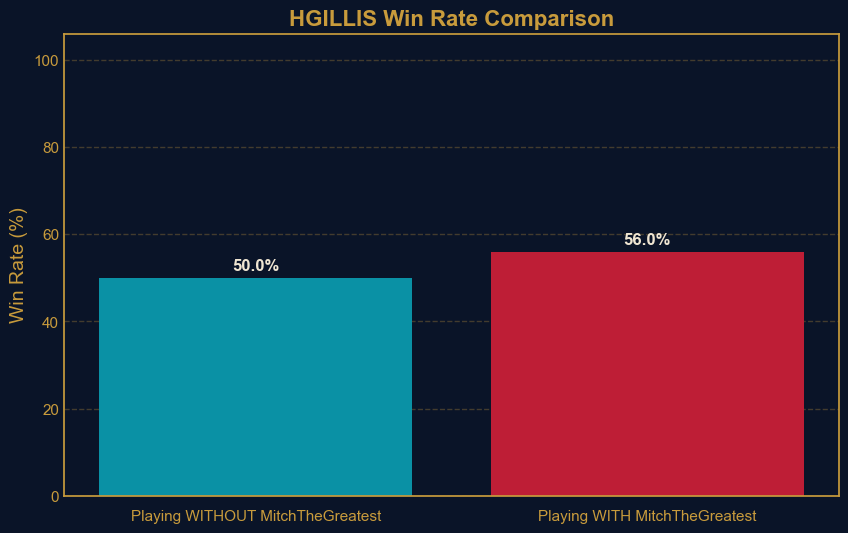

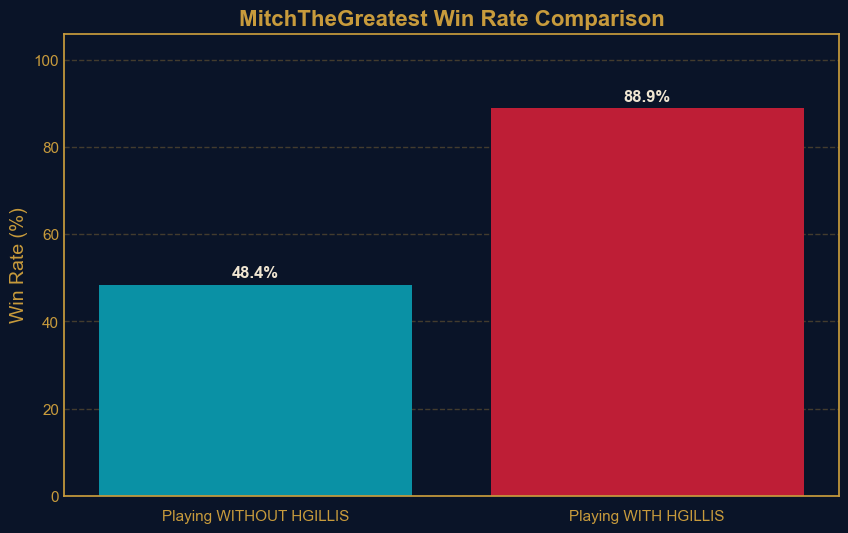

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# 1. Win Rate Comparison
def plot_win_rate_comparison(df_solo, df_duo, title, duo_game_name):
    win_rate_solo = df_solo['win'].mean() * 100
    win_rate_duo = df_duo['win'].mean() * 100
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0A1428')  # Overall figure background color
    bars = ax.bar(
        x=['Playing WITHOUT ' + duo_game_name, 'Playing WITH ' + duo_game_name],  # Dynamic x-axis labels
        height=[win_rate_solo, win_rate_duo],
        color=['#0A91A5', '#BE1E36'],  # Custom bar colors
        linewidth=0  # Remove the white outline on the bars
    )
    
    # Set Y-axis height limit to 100
    ax.set_ylim(0, 106)
    
    # Add value labels to the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', color='#F0E6D2', weight='bold', fontsize=12)
    
    # Apply League of Legends style colors
    ax.set_title(title, fontsize=16, weight='bold', color='#C89B3C')  # Title in gold
    ax.set_ylabel('Win Rate (%)', fontsize=14, color='#C89B3C')  # Y-axis label in gold
    ax.set_xlabel('', fontsize=12, color='#C89B3C')  # Blank X-axis label, styled in gold
    
    # Set axes background color
    ax.set_facecolor('#0A1428')  # Dark navy axes background
    
    # Customize tick colors
    ax.tick_params(axis='x', colors='#C89B3C')  # X ticks in gold
    ax.tick_params(axis='y', colors='#C89B3C', length=0)  # Y ticks in gold, remove tick marks
    
    # Change spine (border) colors
    for spine in ax.spines.values():
        spine.set_edgecolor('#C89B3C')  # Gold spines (borders)
    
    # Gridlines with subtle opacity
    ax.grid(True, axis = 'y', linestyle='--', alpha=0.3, color='#C89B3C')  # Light gold gridlines
    ax.grid(False, axis='x')
    
    plt.show()

# Usage:
plot_win_rate_comparison(filtered_DfOne_solo, filtered_DfOne_duo, gameNameOne + ' Win Rate Comparison', gameNameTwo)
plot_win_rate_comparison(filtered_DfTwo_solo, filtered_DfTwo_duo, gameNameTwo + ' Win Rate Comparison', gameNameOne)
